In [162]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras import layers
import matplotlib.cm as cm
import random
import glob
import os
from skimage.segmentation import chan_vese
import numpy as np
import PIL 
from PIL import Image 
from tensorboard.plugins.hparams import api as hp
import pandas as pd
from shutil import copy
import cv2

# Display
# from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# My functions
import my_functions as mf

# tf explain
from tf_explain.callbacks.grad_cam import GradCAMCallback

In [163]:
random_seed = 42

In [164]:
batch_size = 32
img_height = 180
img_width = 180
image_size = (img_height, img_width)

# Testando trocar o canal de uma imagem

In [165]:
img_path = "datasets\\ct_scan_5\\full-COVID-positive\\6_Rahimzadeh_137covid_patient1_SR_4_IM00055.png"

img = keras.preprocessing.image.load_img(img_path, target_size=image_size)
# `array` is a float32 Numpy array of shape (299, 299, 3)
array = keras.preprocessing.image.img_to_array(img)

# Canal destacado
image_contrast = mf.aply_black_tophat_to_image(img_path)
new_channel = cv2.resize(image_contrast, dsize=image_size, interpolation=cv2.INTER_AREA)



FileNotFoundError: [Errno 2] No such file or directory: 'datasets\\ct_scan_5\\full-COVID-positive\\6_Rahimzadeh_137covid_patient1_SR_4_IM00055.png'

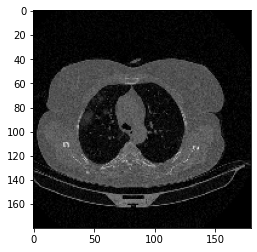

In [ ]:
plt.imshow((array).astype(int), cmap='Greys')

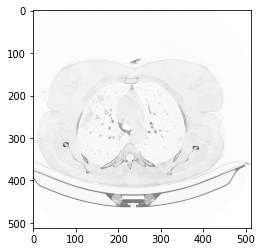

In [ ]:
plt.imshow(image_contrast, cmap= 'Greys')

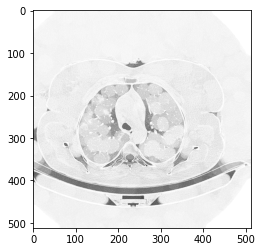

In [ ]:
plt.imshow(image_contrast, cmap= 'Greys')

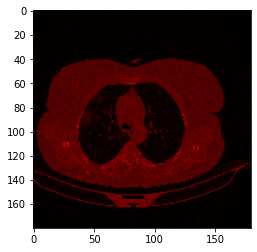

In [ ]:
plt.imshow((np.dstack((array[:, :, :2],new_channel))).astype(int), cmap='Greys')

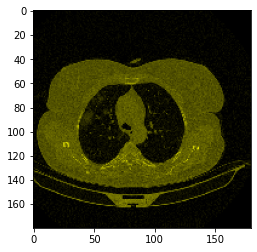

In [ ]:
plt.imshow((np.dstack((array[:, :, :2],new_channel))).astype(int), cmap='Greys')

In [ ]:
np.dstack((array,new_channel))

(180, 180, 4)

In [ ]:
teste_new_image = (np.dstack((array[:, :, :2],new_channel)))

In [ ]:
(teste_new_image[:, :, 0] == teste_new_image[:, :, 1]).all()

True

In [ ]:
(teste_new_image[:, :, 0] == teste_new_image[:, :, 2]).all()

False

In [ ]:
destination_folder_path = "datasets\\ct_scan_5\\teste\\"
image_name = 'teste'
tf.keras.utils.save_img(
   path="{}seg_version_{}".format(destination_folder_path, image_name),
   x=teste_new_image, 
   data_format=None, 
   file_format='png', 
   scale=True
)

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
   'datasets/ct_scan_5/teste',
   labels='inferred',
   label_mode='int',
   class_names=None,
   color_mode='rgb',
   batch_size=batch_size,
   image_size=image_size,
   shuffle=True, 
   seed=random_seed, 
   interpolation='bilinear',
   follow_links=False,
   crop_to_aspect_ratio=False)

Found 2 files belonging to 2 classes.


False


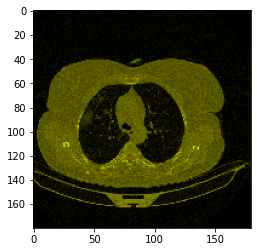

In [ ]:
for element in train_ds:
   print((element[0][0][:, :, 0].numpy() == element[0][0][:, :, 2].numpy()).all())
   plt.imshow((element[0][0].numpy()).astype(int))

In [ ]:
model = keras.models.load_model("my_models\\model_0")


In [ ]:
teste_new_image.shape

(180, 180, 3)

In [ ]:
preds = model.predict(teste_new_image[np.newaxis, :, :, :])
preds

array([[1.]], dtype=float32)

# Testando salvar novas imagens adequadamente

In [ ]:
def get_img_array_with_contrast(img_path, size):
   img = keras.preprocessing.image.load_img(img_path, target_size=size)
   # `array` is a float32 Numpy array of shape (size, 3)
   array = keras.preprocessing.image.img_to_array(img)

   # Canal destacado
   image_contrast = mf.aply_black_tophat_to_image(img_path)
   new_channel = cv2.resize(image_contrast, dsize=image_size, interpolation=cv2.INTER_AREA)

   # Nova imagem com um canal destacado e outros dois default
   new_image = np.dstack((array[:, :, :2] , new_channel))

   return new_image

In [ ]:
def save_new_imgs_with_contrast(src_folder, dest_folder, final_size=(180, 180)):
   list_images_paths = glob.glob(src_folder + "*")
   for current_image_path in list_images_paths:
      image_name = current_image_path.split('\\')[-1]
      result_image = get_img_array_with_contrast(img_path=current_image_path, size=final_size)
      tf.keras.utils.save_img(
         path="{}ctrst_version_{}".format(dest_folder, image_name),
         x=result_image, 
         data_format=None, 
         file_format='png', 
         scale=True
      )

In [ ]:
src_folder_path = "datasets\\ct_scan_3\\train\\COVID-negative\\"
dest_folder_path = "datasets\\ct_scan_5\\train\\COVID-negative\\"
save_new_imgs_with_contrast(src_folder_path, dest_folder_path)

In [ ]:
src_folder_path = "datasets\\ct_scan_3\\train\\COVID-positive\\"
dest_folder_path = "datasets\\ct_scan_5\\train\\COVID-positive\\"
save_new_imgs_with_contrast(src_folder_path, dest_folder_path)

In [ ]:
src_folder_path = "datasets\\ct_scan_3\\val\\COVID-negative\\"
dest_folder_path = "datasets\\ct_scan_5\\val\\COVID-negative\\"
save_new_imgs_with_contrast(src_folder_path, dest_folder_path)

In [ ]:
src_folder_path = "datasets\\ct_scan_3\\val\\COVID-positive\\"
dest_folder_path = "datasets\\ct_scan_5\\val\\COVID-positive\\"
save_new_imgs_with_contrast(src_folder_path, dest_folder_path)

## Datasets objects

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
   'datasets/ct_scan_5/train',
   labels='inferred',
   label_mode='int',
   class_names=None,
   color_mode='rgb',
   batch_size=batch_size,
   image_size=image_size,
   shuffle=True, 
   seed=random_seed, 
   interpolation='bilinear',
   follow_links=False,
   crop_to_aspect_ratio=False)

Found 11851 files belonging to 2 classes.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
   'datasets/ct_scan_5/val',
   labels='inferred',
   label_mode='int',
   class_names=None,
   color_mode='rgb',
   batch_size=batch_size,
   image_size=image_size,
   shuffle=True, 
   seed=random_seed,
   interpolation='bilinear',
   follow_links=False,
   crop_to_aspect_ratio=False)

Found 2632 files belonging to 2 classes.


In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))

data_augmentation = keras.Sequential(
    [
      layers.RandomFlip("horizontal"), 
      layers.RandomRotation(0.1)
    ]
)
x = data_augmentation(inputs)  # Apply random data augmentation
# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
scale_layer = keras.layers.Rescaling(scale=1/127.5, offset=-1)
x = scale_layer(x)
# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
base_model = keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(img_height, img_width, 3),
    input_tensor=x
)
last_layer_base_model = mf.find_last_layer(base_model)

x = tf.keras.layers.GlobalAveragePooling2D()(last_layer_base_model.output)

x = keras.layers.Dense(units=128, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(units=64, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(units=32, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

base_model.trainable = False # Freeze base model

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 180, 180, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 180, 180, 3)  0           sequential_2[0][0]               
__________________________________________________________________________________________________
conv2d_406 (Conv2D)             (None, 89, 89, 32)   864         rescaling_2[0][0]                
____________________________________________________________________________________________

In [ ]:
gcam_image_path = "datasets\\ct_scan_3\\val\\COVID-positive\\P021_106.png"

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(
    optimizer=optimizer,
    loss=keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True)

run_logdir = mf.get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

data = (mf.get_img_array(gcam_image_path, image_size), None)
grd_cam_callback = GradCAMCallback(
   validation_data=data,
   class_index=0,
   output_dir=run_logdir,
)

epochs = 100
base_model.trainable = False
model.fit(
    train_ds, 
    epochs=epochs,
    batch_size=32,
    validation_data=val_ds,
    callbacks=[
      tensorboard_cb, 
      early_stopping_cb, 
      grd_cam_callback])

Epoch 1/100
371/371 [==============================] - 67s 159ms/step - loss: 0.5457 - accuracy: 0.7431 - val_loss: 0.4196 - val_accuracy: 0.8321
Epoch 2/100
371/371 [==============================] - 53s 143ms/step - loss: 0.4375 - accuracy: 0.8037 - val_loss: 0.4121 - val_accuracy: 0.8400
Epoch 3/100
371/371 [==============================] - 53s 142ms/step - loss: 0.4333 - accuracy: 0.7946 - val_loss: 0.3923 - val_accuracy: 0.8625
Epoch 4/100
371/371 [==============================] - 53s 143ms/step - loss: 0.3989 - accuracy: 0.8255 - val_loss: 0.3981 - val_accuracy: 0.8617
Epoch 5/100
371/371 [==============================] - 55s 149ms/step - loss: 0.3770 - accuracy: 0.8441 - val_loss: 0.3755 - val_accuracy: 0.8507
Epoch 6/100
371/371 [==============================] - 55s 147ms/step - loss: 0.3734 - accuracy: 0.8410 - val_loss: 0.3832 - val_accuracy: 0.8545
Epoch 7/100
371/371 [==============================] - 53s 142ms/step - loss: 0.3689 - accuracy: 0.8333 - val_loss: 0.3802 -

[[0.9560196]]


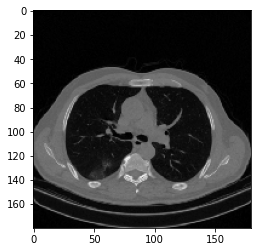

In [ ]:
img_path = "datasets\\ct_scan_3\\val\\COVID-positive\\P004_130.png"
img_array = mf.get_img_array(img_path, size=image_size)
preds = model.predict(img_array)
print(preds)
plt.imshow(img_array[0, :, :, :].astype(int))

[[0.99999976]]


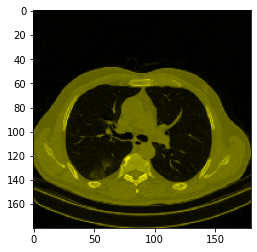

In [ ]:
img_path = "datasets\\ct_scan_5\\val\\COVID-positive\\ctrst_version_P004_130.png"
img_array = mf.get_img_array(img_path, size=image_size)
preds = model.predict(img_array)
print(preds)
plt.imshow(img_array[0, :, :, :].astype(int))

In [ ]:
from skimage.morphology import disk, black_tophat  # noqa


In [166]:
img_path = "datasets\\ct_scan_5\\val\\COVID-positive\\ctrst_version_P004_130.png"
img = keras.preprocessing.image.load_img(img_path)
img_array = keras.preprocessing.image.img_to_array(img)
sample_slice = img_array[:, :, 0]
normalize_slice = np.true_divide(sample_slice, [255.0], out=None)
footprint = disk(12)
w_tophat = black_tophat(normalize_slice, footprint)
w_tophat = np.uint8(255 * w_tophat).astype(int) #### FALTAVA ISSO AQUI ?
w_tophat = w_tophat[:, :, np.newaxis]

In [167]:
w_tophat

array([[[7],
        [7],
        [7],
        ...,
        [6],
        [6],
        [6]],

       [[7],
        [7],
        [7],
        ...,
        [6],
        [6],
        [6]],

       [[7],
        [7],
        [7],
        ...,
        [6],
        [6],
        [6]],

       ...,

       [[6],
        [6],
        [6],
        ...,
        [5],
        [5],
        [5]],

       [[6],
        [6],
        [6],
        ...,
        [5],
        [5],
        [5]],

       [[6],
        [6],
        [6],
        ...,
        [5],
        [5],
        [5]]])

In [133]:
w_tophat.shape

(180, 180, 1)

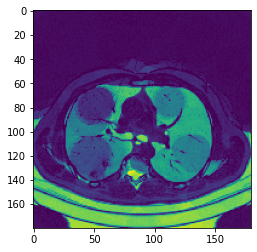

In [132]:
plt.imshow(w_tophat)

In [168]:
img_path = "datasets\\ct_scan_5\\val\\COVID-positive\\ctrst_version_P004_130.png"
img = keras.preprocessing.image.load_img(img_path)
img_array = keras.preprocessing.image.img_to_array(img)

new_channel = cv2.resize(w_tophat, dsize=image_size, interpolation=cv2.INTER_AREA)
# Nova imagem com um canal destacado e outros dois default
new_image = np.dstack((img_array[:, :, :2] , new_channel))

In [171]:
new_image.shape

(180, 180, 3)

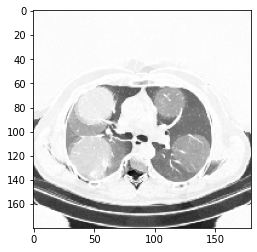

In [172]:
plt.imshow(new_image[:, :, 2].astype(int), cmap='Greys')

In [143]:
new_real_oficial[:, :, 2].max()

0.5686274509803921

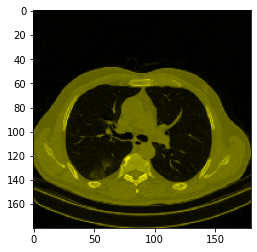

In [138]:
plt.imshow(new_real_oficial.astype(int))

In [99]:
img_array[0][:, :, 2].max()

0.0

[[0.20010825]]


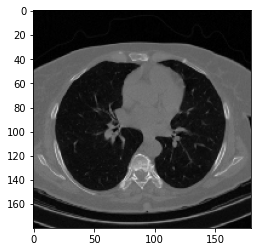

In [77]:
img_path = "datasets\\ct_scan_3\\val\\COVID-negative\\N025_65.png"
img_array = mf.get_img_array(img_path, size=image_size)
preds = model.predict(img_array)
print(preds)
plt.imshow(img_array[0, :, :, :].astype(int))

In [81]:
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
base_model.trainable = True

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True)

run_logdir = mf.get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

data = (mf.get_img_array(gcam_image_path, image_size), None)
grd_cam_callback = GradCAMCallback(
   validation_data=data,
   class_index=0,
   output_dir=run_logdir,
)

epochs = 100
model.fit(
    train_ds, 
    epochs=epochs,
    batch_size=32,
    validation_data=val_ds,
     callbacks=[
      tensorboard_cb, 
      early_stopping_cb, 
      grd_cam_callback])

run_modeldir = mf.get_model_dir()
model.save(run_modeldir)

Epoch 1/100
371/371 [==============================] - 172s 421ms/step - loss: 0.4960 - accuracy: 0.8128 - val_loss: 0.3409 - val_accuracy: 0.8723
Epoch 2/100
371/371 [==============================] - 159s 427ms/step - loss: 0.2972 - accuracy: 0.8799 - val_loss: 0.3090 - val_accuracy: 0.8788
Epoch 3/100
371/371 [==============================] - 159s 428ms/step - loss: 0.2480 - accuracy: 0.9051 - val_loss: 0.2810 - val_accuracy: 0.8944
Epoch 4/100
371/371 [==============================] - 160s 432ms/step - loss: 0.2107 - accuracy: 0.9182 - val_loss: 0.2573 - val_accuracy: 0.9005
Epoch 5/100
371/371 [==============================] - 149s 403ms/step - loss: 0.1879 - accuracy: 0.9269 - val_loss: 0.2524 - val_accuracy: 0.9050
Epoch 6/100
371/371 [==============================] - 155s 419ms/step - loss: 0.1643 - accuracy: 0.9352 - val_loss: 0.2506 - val_accuracy: 0.9100
Epoch 7/100
371/371 [==============================] - 154s 414ms/step - loss: 0.1468 - accuracy: 0.9453 - val_loss: 0

C:\Users\arthur.morais\AppData\Local\Programs\Python\Python37\lib\site-packages\tf_explain\utils\display.py:112: RuntimeWarning: invalid value encountered in true_divide
  heatmap = (heatmap - np.min(heatmap)) / (heatmap.max() - heatmap.min())


Epoch 11/100
371/371 [==============================] - 150s 404ms/step - loss: 0.0847 - accuracy: 0.9706 - val_loss: 0.2752 - val_accuracy: 0.9229
Epoch 12/100
371/371 [==============================] - 149s 400ms/step - loss: 0.0785 - accuracy: 0.9708 - val_loss: 0.2972 - val_accuracy: 0.9236
INFO:tensorflow:Assets written to: .\my_models\run_2021_11_07-17_56_50\assets
